In [100]:
import numpy as np
from scipy import stats
import pickle as pk
import matplotlib.pyplot as plt
import math
from scipy import integrate

In [149]:
def itt_nu(vlass_flux, nvss_flux):
    freq_nvss = 1.4
    freq_vlass = [0, 3]
    nu = [-0.7]
    i = 1
    
    #while (freq_vlass[i]-freq_vlass[i-1])/freq_vlass[i] > 0.01:
        #print((freq_vlass[i]-freq_vlass[i-1])/freq_vlass[i])
    while i < 100:
        #print((freq_vlass[i]-freq_vlass[i-1])/freq_vlass[i])
        
        const_v = np.log(freq_vlass[i]/freq_nvss)

        spectral_index = (np.log(vlass_flux/nvss_flux)/(const_v)) 
        freq_vlass_guess = anal_cent_freq(spectral_index)
        
        freq_vlass.append(freq_vlass_guess)
        nu.append(spectral_index)
        
        
        i+=1
        
        #print(abs((freq_vlass[i]-freq_vlass[i-1])/freq_vlass[i]))
        if abs((freq_vlass[i]-freq_vlass[i-1])/freq_vlass[i]) < 0.001:
            return(freq_vlass, nu)
        if i > 100:
            print('Error, did not converge')
            return(freq_vlass, nu)
    return(freq_vlass, nu)
        

In [146]:
def cent_freq(alpha):
    x1 = lambda x: x**alpha
    x2 = lambda x: x*x**alpha
    return integrate.quad(x2, 2, 4)[0]/ integrate.quad(x1,2,4)[0]

def anal_cent_freq(alpha):
    return (alpha+1)/(alpha+2)*(4**(alpha+2)-2**(alpha+2))/(4**(alpha+1)-2**(alpha+1))

In [147]:
v = -0.7

print(cent_freq(v))
print(anal_cent_freq(v))

2.9198306185674934
2.9198306185674934


In [150]:
"""'MOO J1131+3217': {'NVSS': 0.020253161867937568,
  'VLASS': 0.009777066533970924,
  'nu': -0.9555611562231429,
  '90': 0.0003790782583089198,
  '150': 0.0002326691637289474},"""


itt_nu(0.009777066533970924, 0.020253161867937568)

0.037888126859651934
0.0019479625877741591
0.00010742413985124545


([0, 3, 2.890484939910748, 2.884865330176797, 2.88455545928773],
 [-0.7, -0.9555611562231429, -1.0045787561138677, -1.0072827148428183])

In [6]:
act_fluxes_dict = pk.load(open('ACT_central_flux_Dec09.pickle', 'rb'))
mdcw_fluxes_dict = pk.load(open('Madcows_central_flux_Dec09.pickle', 'rb'))



In [7]:
print(mdcw_fluxes_dict['MOO J1142+1527'])

[0.013324372438853467, 0.0009917393671757503]


In [20]:
nvss_act_fluxes = np.zeros(len(act_fluxes_dict.keys())-1)
back_sub_nvss_act_fluxes =np.zeros(len(act_fluxes_dict.keys())-1)
for i, key in enumerate(act_fluxes_dict.keys()):
    if i == 0: continue
    nvss_act_fluxes[i-1] = act_fluxes_dict[key][0]
    back_sub_nvss_act_fluxes[i-1] = (act_fluxes_dict[key][0] - act_fluxes_dict[key][1])
    
nvss_mdcw_fluxes = np.zeros(len(mdcw_fluxes_dict.keys())-1)
back_sub_nvss_mdcw_fluxes = np.zeros(len(mdcw_fluxes_dict.keys())-1)
for i, key in enumerate(mdcw_fluxes_dict.keys()):
    if i == 0: continue
    nvss_mdcw_fluxes[i-1] = mdcw_fluxes_dict[key][0]
    back_sub_nvss_mdcw_fluxes[i-1] = (mdcw_fluxes_dict[key][0] - mdcw_fluxes_dict[key][1])
    


#print(len(back_sub_nvss_act_fluxes))
cut = -99
nvss_act_fluxes = nvss_act_fluxes[nvss_act_fluxes > cut]
nvss_mdcw_fluxes = nvss_mdcw_fluxes[nvss_mdcw_fluxes > cut]
nvss_act_fluxes.sort()
nvss_mdcw_fluxes.sort()

back_sub_nvss_act_fluxes = back_sub_nvss_act_fluxes[back_sub_nvss_act_fluxes > cut]
back_sub_nvss_mdcw_fluxes = back_sub_nvss_mdcw_fluxes[back_sub_nvss_mdcw_fluxes > cut]
back_sub_nvss_act_fluxes.sort()
back_sub_nvss_mdcw_fluxes.sort()

min_act = min(back_sub_nvss_act_fluxes)
min_mdcw = min(back_sub_nvss_mdcw_fluxes)

#back_sub_nvss_act_fluxes = [1e3*value for value in back_sub_nvss_act_fluxes]
#back_sub_nvss_mdcw_fluxes = [1e3*value for value in back_sub_nvss_mdcw_fluxes]

#back_sub_nvss_act_fluxes = [value+min_act for value in back_sub_nvss_act_fluxes]
#back_sub_nvss_mdcw_fluxes = [value+min_mdcw for value in back_sub_nvss_mdcw_fluxes]
print(np.mean(nvss_mdcw_fluxes), np.mean(back_sub_nvss_mdcw_fluxes))


0.003518886148919963 0.0032455269904598802


6.848772852391118e-06


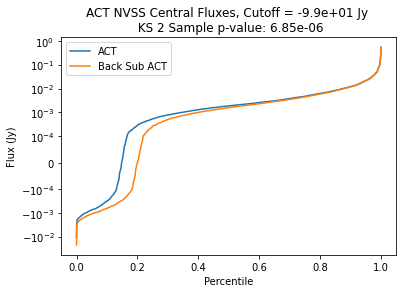

0.005455823780235355 0.005137063485686758
1.2105154840871637e-07
0.003518886148919963 0.0032455269904598802


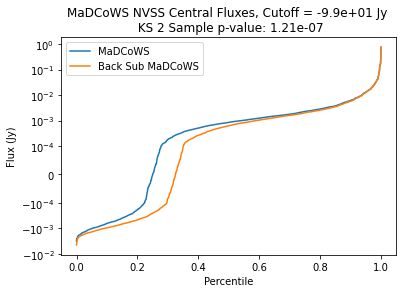

0.9999999999999979


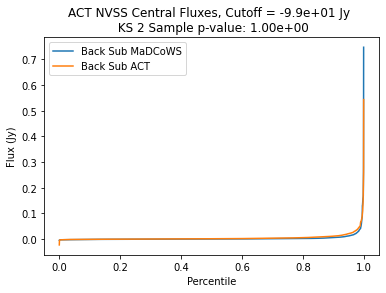

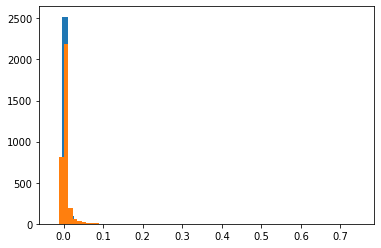

In [11]:
x0 = np.arange(len(nvss_act_fluxes))
x1 = np.arange(len(nvss_mdcw_fluxes))
x2 =  np.arange(len(back_sub_nvss_act_fluxes))
x3 =  np.arange(len(back_sub_nvss_mdcw_fluxes))



plt.plot(x0/len(x0), nvss_act_fluxes, label = 'ACT')
plt.plot(x2/len(x2), back_sub_nvss_act_fluxes, label = 'Back Sub ACT')
p_value = stats.ks_2samp(nvss_act_fluxes, back_sub_nvss_act_fluxes)[1]

#p_value = stats.ks_2samp(nvss_act_fluxes, nvss_mdcw_fluxes)[1]
plt.legend()

plt.xlabel('Percentile')
plt.ylabel('Flux (Jy)')
plt.title('ACT NVSS Central Fluxes, Cutoff = {:.1e} Jy \n KS 2 Sample p-value: {:.2e}'.format(cut, p_value))
plt.yscale('symlog', linthreshy=1e-4)

print(p_value)
plt.savefig('./plots/KStests/NVSS_act_back_sub.pdf')
plt.show()
print(np.mean(nvss_act_fluxes),np.mean(back_sub_nvss_act_fluxes))


plt.plot(x1/len(x1), nvss_mdcw_fluxes, label = 'MaDCoWS')
plt.plot(x3/len(x3), back_sub_nvss_mdcw_fluxes, label = 'Back Sub MaDCoWS')
p_value = stats.ks_2samp(nvss_mdcw_fluxes, back_sub_nvss_mdcw_fluxes)[1]

#p_value = stats.ks_2samp(nvss_act_fluxes, nvss_mdcw_fluxes)[1]
plt.legend()

plt.xlabel('Percentile')
plt.ylabel('Flux (Jy)')
plt.title('MaDCoWS NVSS Central Fluxes, Cutoff = {:.1e} Jy \n KS 2 Sample p-value: {:.2e}'.format(cut, p_value))
plt.yscale('symlog', linthreshy=1e-4)

print(p_value)
plt.savefig('./plots/KStests/NVSS_mdcw_back_sub.pdf')
print(np.mean(nvss_mdcw_fluxes),np.mean(back_sub_nvss_mdcw_fluxes))
plt.show()
plt.close()

plt.plot(x3/len(x3), back_sub_nvss_mdcw_fluxes, label = 'Back Sub MaDCoWS')
#plt.plot(x1/len(x1), nvss_mdcw_fluxes, label = 'MaDCoWS')
#plt.plot(x0/len(x0), nvss_act_fluxes, label = 'ACT')
plt.plot(x2/len(x2), back_sub_nvss_act_fluxes, label = 'Back Sub ACT')
p_value = stats.ks_2samp(back_sub_nvss_mdcw_fluxes, back_sub_nvss_act_fluxes)[1]

plt.legend()

plt.xlabel('Percentile')
plt.ylabel('Flux (Jy)')
plt.title('ACT NVSS Central Fluxes, Cutoff = {:.1e} Jy \n KS 2 Sample p-value: {:.2e}'.format(cut, p_value))
#plt.yscale('symlog', linthreshy=1e-4)

print(p_value)
plt.savefig('./plots/KStests/NVSS_act_mdcw_comp_back_sub.pdf')
plt.show()

plt.hist(back_sub_nvss_mdcw_fluxes, bins = 50)
plt.hist(back_sub_nvss_act_fluxes, bins = 50)
plt.show()

# VLASS KS Test

In [71]:
vlass_mdcw_fluxes_dict = pk.load(open('./pks/smooth_vlass.p', 'rb'))
print(vlass_mdcw_fluxes_dict)

{'MOO J0538-2326': [-1.7484474e-05, 5.5372083252791526e-05], 'MOO J1528+1752': [-1.0814352e-05, 3.166539804588808e-05], 'MOO J2317-2342': [1.3532866e-05, 7.130426853763083e-05], 'MOO J1550+5727': [0.001101234, 5.135477510886943e-05], 'MOO J0950+0425': [2.560937e-05, 6.912918723678274e-06], 'MOO J0254+1012': [0.0020875558, 0.007846900655749778], 'MOO J0253-0619': [-4.069822e-05, 9.058356005287038e-06], 'MOO J1507+3126': [0.00052098616, 2.9234478132966757e-05], 'MOO J1257-2214': [-2.9575226e-06, 3.035820695185265e-05], 'MOO J1203-0909': [0.0001298892, 6.282303667504152e-05], 'MOO J1535+2329': [0.00031704677, 0.0069035147414524545], 'MOO J0304-1612': [3.7050459e-06, 1.1145851881666502e-05], 'MOO J1219+4250': [4.6280533e-05, 0.000474992915840744], 'MOO J1337-2911': [7.281469e-06, 0.0005255712524245837], 'MOO J1234+4021': [0.00013638404, 7.871181135143956e-05], 'MOO J0218-1416': [-0.0004577175, -0.0001846831840417451], 'MOO J2214-0621': [0.0015621746, 1.6989935405220535e-06], 'MOO J1310+285

In [17]:
vlass_dict_mdcw = {}

vlass_mdcw_fluxes = []
back_sub_vlass_mdcw_fluxes = []
for i, key in enumerate(vlass_mdcw_fluxes_dict.keys()):
    if i == 0: continue
    if np.isnan(vlass_mdcw_fluxes_dict[key][0]) or np.isnan(vlass_mdcw_fluxes_dict[key][1]):continue
    flux = vlass_mdcw_fluxes_dict[key][0]
    backsub_flux = vlass_mdcw_fluxes_dict[key][0] - vlass_mdcw_fluxes_dict[key][1]
    vlass_dict_mdcw[key] = [flux, backsub_flux]
    vlass_mdcw_fluxes.append(flux)
    back_sub_vlass_mdcw_fluxes.append(backsub_flux)

vlass_mdcw_fluxes = np.array(vlass_mdcw_fluxes)    
back_sub_vlass_mdcw_fluxes= np.array(back_sub_vlass_mdcw_fluxes)

cut = -99
vlass_mdcw_fluxes = vlass_mdcw_fluxes[vlass_mdcw_fluxes > cut]
vlass_mdcw_fluxes.sort()

back_sub_vlass_mdcw_fluxes = back_sub_vlass_mdcw_fluxes[back_sub_vlass_mdcw_fluxes > cut]
back_sub_vlass_mdcw_fluxes.sort()

In [24]:
print(np.mean(back_sub_vlass_mdcw_fluxes))
print(np.mean(vlass_mdcw_fluxes))
print(vlass_mdcw_fluxes_dict)

0.0006529346370584141
0.0013041112
{'MOO J0001+142': 0.001351835538655588, 'MOO J0001+364': 0.002224073058355286, 'MOO J0001+344': 0.0003297147885352736, 'MOO J0001-244': -0.0005791305775078165, 'MOO J0001-253': 0.0019357377765123474, 'MOO J0002-082': 0.0046990286056194375, 'MOO J0002+175': -0.00220595162015802, 'MOO J0003-292': 0.00038656812357174, 'MOO J0003-134': -0.004067045245599976, 'MOO J0006-024': 0.0037598714483020323, 'MOO J0005+002': -0.005729571184000637, 'MOO J0004+010': -0.0007256243013991082, 'MOO J0005+132': -0.005747984273061044, 'MOO J0005+140': 0.003332856939297524, 'MOO J0005-044': -0.002002629574725301, 'MOO J0006+305': -0.0020352672159442142, 'MOO J0006-075': -0.005206318488754524, 'MOO J0007-210': 0.001165724700221138, 'MOO J0008-170': 0.001015826068045289, 'MOO J0009-075': -0.002186817657649498, 'MOO J0010+202': -0.004314674434109378, 'MOO J0010+314': -0.0011341070602658432, 'MOO J0010+275': -0.0015137713674933106, 'MOO J0011-141': 0.009178661776339858, 'MOO J00

8.022431620468353e-49
0.0013041119 0.0006376277880704783


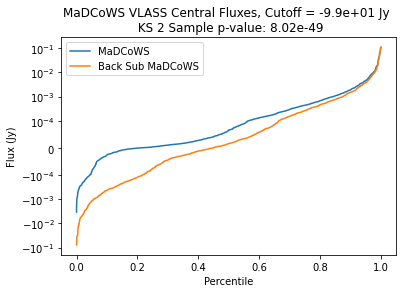

In [39]:
x1 = np.arange(len(vlass_mdcw_fluxes))
x3 =  np.arange(len(back_sub_vlass_mdcw_fluxes))

plt.plot(x1/len(x1), vlass_mdcw_fluxes, label = 'MaDCoWS')
plt.plot(x3/len(x3), back_sub_vlass_mdcw_fluxes, label = 'Back Sub MaDCoWS')
p_value = stats.ks_2samp(vlass_mdcw_fluxes, back_sub_vlass_mdcw_fluxes)[1]

#p_value = stats.ks_2samp(nvss_act_fluxes, nvss_mdcw_fluxes)[1]
plt.legend()

plt.xlabel('Percentile')
plt.ylabel('Flux (Jy)')
plt.title('MaDCoWS VLASS Central Fluxes, Cutoff = {:.1e} Jy \n KS 2 Sample p-value: {:.2e}'.format(cut, p_value))
plt.yscale('symlog', linthreshy=1e-4)

print(p_value)
plt.savefig('./plots/KStests/VLASS_mdcw_back_sub.pdf')
print(np.mean(vlass_mdcw_fluxes),np.mean(back_sub_vlass_mdcw_fluxes))
plt.show()
plt.close()


# Compute spectral indecies

In [21]:
mooFile = open("madcowsCentralFlux.txt",'r')
mooLines = mooFile.readlines()
actFile = open("actCentralFlux.txt",'r')
actLines = actFile.readlines()
vlassmooNameArr = [] # moo names stored here
vlassmooFluxArr = [] # moo fluxes stored here
for line in mooLines:
    vlassmooNameArr.append(line.strip()[2:15])
    vlassmooFluxArr.append(float(line.strip()[18:len(line.strip())-2]))
vlassactNameArr = [] # act names stored here
vlassactFluxArr = [] # act fluxes stored here
for line in actLines:
    
    temp = float(line.strip()[23:len(line.strip())-2])
    if np.isnan(temp):continue
    vlassactFluxArr.append(temp)
    vlassactNameArr.append(line.strip()[2:21])

vlass_act_fluxes_dict = {}
#print(mooLines)
for i, key in enumerate(vlassactNameArr):
    vlass_act_fluxes_dict[key] = vlassactFluxArr[i]
vlass_mdcw_fluxes_dict = {}
for i, key in enumerate(vlassmooNameArr):
    vlass_mdcw_fluxes_dict[key] = vlassmooFluxArr[i]

In [13]:
nvss_act_fluxes_dict = pk.load(open('ACT_central_flux.pickle', 'rb'))
nvss_mdcw_fluxes_dict = pk.load(open('Madcows_central_flux.pickle', 'rb'))
#nvss_act_fluxes_dict.pop('Name')
#nvss_mdcw_fluxes_dict.pop('Name')

In [31]:

print(vlass_mdcw_fluxes_dict.keys())
#print(mdcw_fluxes_dict.keys())

dict_keys(['MOO J0001+142', 'MOO J0001+364', 'MOO J0001+344', 'MOO J0001-244', 'MOO J0001-253', 'MOO J0002-082', 'MOO J0002+175', 'MOO J0003-292', 'MOO J0003-134', 'MOO J0006-024', 'MOO J0005+002', 'MOO J0004+010', 'MOO J0005+132', 'MOO J0005+140', 'MOO J0005-044', 'MOO J0006+305', 'MOO J0006-075', 'MOO J0007-210', 'MOO J0008-170', 'MOO J0009-075', 'MOO J0010+202', 'MOO J0010+314', 'MOO J0010+275', 'MOO J0011-141', 'MOO J0011-253', 'MOO J0012-021', 'MOO J0012-194', 'MOO J0013+070', 'MOO J0014-090', 'MOO J0014-045', 'MOO J0015+205', 'MOO J0015+282', 'MOO J0015-135', 'MOO J0015+080', 'MOO J0015+104', 'MOO J0017+141', 'MOO J0018+085', 'MOO J0018+225', 'MOO J0018+311', 'MOO J0018-145', 'MOO J0018+120', 'MOO J0018+000', 'MOO J0019-190', 'MOO J0021+015', 'MOO J0020-124', 'MOO J0020+355', 'MOO J0020-255', 'MOO J0021-143', 'MOO J0021-064', 'MOO J0021-185', 'MOO J0022-273', 'MOO J0022-180', 'MOO J0023+091', 'MOO J0023+145', 'MOO J0025-094', 'MOO J0024+284', 'MOO J0024-034', 'MOO J0024+330', 'MO

In [177]:
radio_dict = {}
const_v = np.log(3/1.4)

for key in mdcw_fluxes_dict.keys():
    if key == 'Name': continue
    

    if key in vlass_mdcw_fluxes_dict.keys():
        #print('Here')
        nvss_backsub_flux = mdcw_fluxes_dict[key][0] - mdcw_fluxes_dict[key][1]
        vlass_backsub_flux = vlass_mdcw_fluxes_dict[key][0] - vlass_mdcw_fluxes_dict[key][1]
        
        cut = 2.5e-3
        if nvss_backsub_flux < cut or vlass_backsub_flux < cut: continue
        
        spectral_index = itt_nu(vlass_backsub_flux, nvss_backsub_flux)[1][-1]
        
        if np.isnan(spectral_index): continue

        #Doesn't really matter whether we use nvss or vlass here as our model is exactly constrained by the data
        flux_90 = nvss_backsub_flux*(90/1.4)**spectral_index
        flux_150 = nvss_backsub_flux*(150/1.4)**spectral_index
        radio_dict[key] = {'NVSS':nvss_backsub_flux, 'VLASS':vlass_backsub_flux, 'nu':spectral_index, '90':flux_90, '150':flux_150}
        

"""
for key in vlass_mdcw_fluxes_dict.keys():
    #print(key)
    temp_key = key
    
    if key in mdcw_fluxes_dict.keys():

        nvss_backsub_flux = mdcw_fluxes_dict[temp_key][0] - mdcw_fluxes_dict[temp_key][1]
        vlass_backsub_flux = vlass_dict_mdcw[key][0] - vlass_mdcw_fluxes_dict[key][1]
        if nvss_backsub_flux < 5e-3 or vlass_backsub_flux < 5e-3: continue
        
        spectral_index = (np.log(vlass_backsub_flux/nvss_backsub_flux)/(const_v))
        
        if np.isnan(spectral_index): continue
        #print(np.abs(vlass_mdcw_fluxes_dict[vlasskey]/float(nvss_mdcw_fluxes_dict[key])))
        #Doesn't really matter whether we use nvss or vlass here as our model is exactly constrained by the data
        flux_90 = nvss_backsub_flux*(90/1.4)**spectral_index
        flux_150 = nvss_backsub_flux*(150/1.4)**spectral_index
        radio_dict[key] = {'NVSS':nvss_backsub_flux, 'VLASS':vlass_backsub_flux, 'nu':spectral_index, '90':flux_90, '150':flux_150}
        
        
"""

0.0009480183752797109
0.037888126859651934
0.0019479625877741591
0.00010742413985124545
0.027240847737597284
0.0010000908383687621
3.860802629910499e-05
0.009298394582962216
0.00011206882351828124
0.03667804609626916
0.0018242889004172487
9.710581206994666e-05
0.011081248021376507
0.00016314313804032869
0.03089472608673448
0.001289700396729195
5.6999674428922514e-05
0.043247967848034786
0.002544855467820992
0.00016223204723384208
0.01567438991336325
0.0003279009662589663
0.06563878480042488
0.005892833264367256
0.0005971297803170016
0.06981462290982743
0.006665660602039662
0.0007236878928889134
0.04446216149782319
0.0026911807771772467
0.00017686854988810814
0.08515631187096132
0.009881504671381245
0.0013387908552503671
0.00018494877635820005
0.045876409972746446
0.0028667736047759064
0.0001950258823013787
0.023267132930269992
0.0007273534395962801
0.03378998485974218
0.0015456482906754715
7.525897156105383e-05
0.03560738362498018
0.0017182735717948532
8.856083397520803e-05
0.060062222

"\nfor key in vlass_mdcw_fluxes_dict.keys():\n    #print(key)\n    temp_key = key\n    \n    if key in mdcw_fluxes_dict.keys():\n\n        nvss_backsub_flux = mdcw_fluxes_dict[temp_key][0] - mdcw_fluxes_dict[temp_key][1]\n        vlass_backsub_flux = vlass_dict_mdcw[key][0] - vlass_mdcw_fluxes_dict[key][1]\n        if nvss_backsub_flux < 5e-3 or vlass_backsub_flux < 5e-3: continue\n        \n        spectral_index = (np.log(vlass_backsub_flux/nvss_backsub_flux)/(const_v))\n        \n        if np.isnan(spectral_index): continue\n        #print(np.abs(vlass_mdcw_fluxes_dict[vlasskey]/float(nvss_mdcw_fluxes_dict[key])))\n        #Doesn't really matter whether we use nvss or vlass here as our model is exactly constrained by the data\n        flux_90 = nvss_backsub_flux*(90/1.4)**spectral_index\n        flux_150 = nvss_backsub_flux*(150/1.4)**spectral_index\n        radio_dict[key] = {'NVSS':nvss_backsub_flux, 'VLASS':vlass_backsub_flux, 'nu':spectral_index, '90':flux_90, '150':flux_150}\n

In [178]:
radio_dict
pk.dump(radio_dict, open('./pks/nus.p', 'wb'))

In [174]:
nus = []
nvss_fluxes = []
vlass_fluxes = []
for key in radio_dict.keys():
    if math.isnan(radio_dict[key]['nu']): continue
    nus.append(radio_dict[key]['nu'])
    nvss_fluxes.append(radio_dict[key]['NVSS'])
    vlass_fluxes.append(radio_dict[key]['VLASS'])
    
#cut_nu = np.array(nus)[np.array(nus)<5]

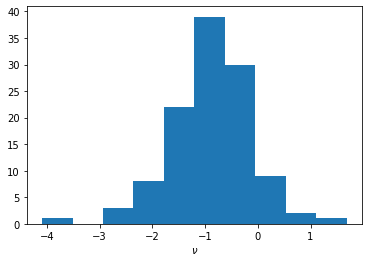

In [171]:
plt.hist(nus)
plt.xlabel(r'$\nu$')
plt.savefig('./plots/2.5radio_nus.pdf')

In [172]:
np.mean(nus)

-0.8941504879333702

In [69]:
print(np.mean(nvss_fluxes))
print(np.mean(vlass_fluxes))

0.0005396945891544909
0.0016716606103633967


In [209]:
zipped_lists = zip(fluxes, nus)


sorted_zipped_lists = sorted(zipped_lists)
print(sorted_zipped_lists)

sorted_list1 = [element for _, element in sorted_zipped_lists]

[('-0.00010045965058290677', 9.342303801603004), ('-0.00010149660592343811', 5.227508672857886), ('-0.00011404907074314784', -0.9297979447671896), ('-0.0001151225882088625', 5.4446861381864595), ('-0.00011690936282653993', 7.060891630063547), ('-0.00012749096251602762', 2.1723800904260075), ('-0.00013255350976552722', 5.041101275997833), ('-0.0001365247765038332', 4.39619316266724), ('-0.00013857829095069053', 3.974785631478451), ('-0.0001431843065239943', 5.870708758859971), ('-0.00014783496228338683', 1.636197319182742), ('-0.00015043098723174314', 4.170991587694809), ('-0.00015465581130614985', 5.830837554548109), ('-0.00015484440721977492', 6.630081170189851), ('-0.00015768049979300702', 3.7339682436992008), ('-0.0001640878616092282', 1.2437125774361686), ('-0.00016858372779047983', 2.992933286857028), ('-0.00017459159381320733', 6.876136712508439), ('-0.00017544288716815528', 0.051837140503572667), ('-0.00018344077934550894', 3.8157737820526876), ('-0.00018538519631178024', 1.4259

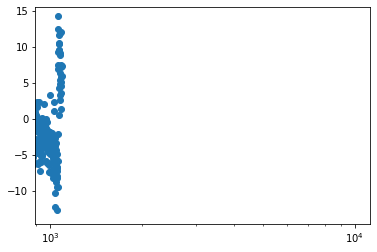

In [226]:
fluxes.sort()
rescale = [1e3*float(flux) for flux in fluxes]
plt.scatter(fluxes, sorted_list1)
plt.xscale('log')
#plt.xticks(np.arange(-1e-4,1e-2, step = 1e-3))

In [229]:
print(np.mean(nvss_mdcw_fluxes))

0.004126651915368459


In [244]:
for i, flux, in enumerate(vlassactFluxArr):
    if np.isnan(flux):
        vlassactFluxArr.pop(i)

In [19]:
print(v['MOO J0208-2951'])

KeyError: 'MOO J0208-2951'

In [7]:
#Clusters with y_0< -0.5
names = ['MOO J0043-2338', 'MOO J0208-2951', 'MOO J0306+0857', 'MOO J0354-2522',
 'MOO J0936+0336', 'MOO J2052-1408', 'MOO J2247+0507', 'MOO J2347-2734',
 'MOO J2038-3334']
for name in names:
    print(name)
    try:
        print(vlass_mdcw_fluxes_dict[name])
    except:
        print('h')
    print(nvss_mdcw_fluxes_dict[name])


MOO J0043-2338
h
[0.0059675188726551085, 0.00019149398712327173]
MOO J0208-2951
h
[0.03931925903658593, -0.00019755247822176992]
MOO J0306+0857
h
[0.03281623855447538, 0.0004513995702705938]
MOO J0354-2522
h
[0.2064431466705777, 0.0002227625510443941]
MOO J0936+0336
h
[0.036242353598764744, -0.00045654470223637286]
MOO J2052-1408
h
[0.0022240629888389167, 0.0005576805164401024]
MOO J2247+0507
h
[0.2201422664810533, 0.0002653516304617302]
MOO J2347-2734
h
[0.00040039119166035674, 0.00038353910240778864]
MOO J2038-3334
h
[0.007197404151314391, -0.00017308302389715423]


In [41]:
#High richness, low y0 clusters
names = ['MOO J0110-1521', 'MOO J0133-1057', 'MOO J0305+0453',
           'MOO J0448-1705', 'MOO J1322-0228', 'MOO J1346-0142',
           'MOO J1514+1346', 'MOO J0012+1602', 'MOO J1221+1603',
           'MOO J1426+1741']

for name in names:
    print(name)
    try:
        print(vlass_mdcw_fluxes_dict[name])
    except:
        print('h')
    print(nvss_mdcw_fluxes_dict[name])

MOO J0110-1521
h
[0.010233948248307131, -0.0004404534178601427]
MOO J0133-1057
h
[0.0058933376467126585, 0.0001266137209136411]
MOO J0305+0453
h
[0.03502558255267253, 0.0014892267338920033]
MOO J0448-1705
h
[0.0057291347559922596, 0.001253648671692225]
MOO J1322-0228
h
[0.0013319518467223008, 0.0003441544156424413]
MOO J1346-0142
h
[0.008598731682915361, 0.0008955004024549659]
MOO J1514+1346
h
[0.003021608801664628, 1.542291127703354e-05]
MOO J0012+1602
h
[0.012421487827244023, -0.0002646806151062457]
MOO J1221+1603
h
[0.002046866962660624, -0.00013855129909827408]
MOO J1426+1741
h
[0.0018466689782928264, -0.00022097920897193494]


In [8]:
names = ['MOO J1052+0823']
for name in names:
    print(name)
    try:
        print(vlass_mdcw_fluxes_dict[name])
    except:
        continue
    print(nvss_mdcw_fluxes_dict[name])

MOO J1052+0823


In [92]:
print('{:.2f}'.format(np.sqrt(x**2+y**2+z**2)))

3.47


In [95]:
#print(back_sub_nvss_mdcw_fluxes[2573])
nums = np.where((back_sub_nvss_mdcw_fluxes >1e-2))[0]
print(nums)
keys = []
for i, key in enumerate(mdcw_fluxes_dict.keys()):
    if i-1 in nums:
        print(key)
        keys.append(key)
        print((mdcw_fluxes_dict[key][0] - mdcw_fluxes_dict[key][1]))

[  48  134  197  418  688  706  853 1588 1664 1806 1911 2573 2651 2668
 2680]
MOO J1922+7918
0.018707761403196084
MOO J1533+6516
0.011050086350457506
MOO J1426+0925
0.036907413066557884
MOO J2247+0507
0.02159376917263856
MOO J0318+2139
0.02005494564323441
MOO J1251+2823
0.011431284389121207
MOO J1034+3104
0.019365208568623903
MOO J1245+7613
0.017534387783171863
MOO J1116+2659
0.0222345317533526
MOO J1422-0910
0.020466561667721275
MOO J2218-1820
0.011782628682907914
MOO J1404+6550
0.0911767144427054
MOO J1124+0455
0.010769117842479706
MOO J0354-2522
0.02019328936597362
MOO J2056-1954
0.015633602058907112


In [98]:
for key in vlass_dict_mdcw.keys():
    if key[:-5] in keys:
        print(key[:-5])
        print(vlass_mdcw_fluxes_dict[key][0] - vlass_mdcw_fluxes_dict[key][1])
        print((mdcw_fluxes_dict[key[:-5]][0] - mdcw_fluxes_dict[key[:-5]][1]))

MOO J1533+6516
0.034670352695172824
0.011050086350457506
MOO J1422-0910
0.10761154950481
0.020466561667721275
MOO J0318+2139
0.06283476492228601
0.02005494564323441
MOO J1251+2823
0.06670596744178248
0.011431284389121207
MOO J1245+7613
0.06291448007203826
0.017534387783171863
MOO J0354-2522
0.053127419833558065
0.02019328936597362
MOO J2247+0507
0.08412190346632542
0.02159376917263856
MOO J2218-1820
0.01902228060875899
0.011782628682907914
MOO J1426+0925
0.10372629031706992
0.036907413066557884
